In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import os

# load data

In [ ]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# zipref=zipfile.ZipFile("pizza_steak.zip", "r")
# zipref.extractall()
# zipref.close()

# visulazation dataset

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


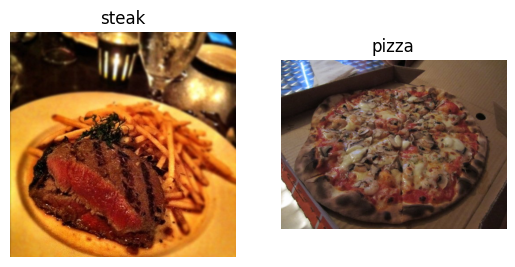

In [ ]:
plt.figure()
plt.subplot(1,2,1)
random_steak=view_random_image(target_dir="pizza_steak/train/",target_class='steak')
plt.subplot(1,2,2)
random_pizza=view_random_image(target_dir="pizza_steak/train/",target_class='pizza')

# preprocessing

In [ ]:


train_dict='pizza_steak/train/'
test_dict='pizza_steak/test'

In [ ]:
# apple normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data=train_datagen.flow_from_directory(
    train_dict,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=True

)
test_data=test_datagen.flow_from_directory(
    test_dict,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
images

array([[[[0.9450981 , 0.8117648 , 0.45882356],
         [0.9490197 , 0.81568635, 0.46274513],
         [0.93725497, 0.80392164, 0.454902  ],
         ...,
         [0.9725491 , 0.882353  , 0.61960787],
         [0.95294124, 0.854902  , 0.59607846],
         [0.9568628 , 0.8588236 , 0.6       ]],

        [[0.9333334 , 0.8000001 , 0.44705886],
         [0.9333334 , 0.8000001 , 0.45098042],
         [0.9294118 , 0.7960785 , 0.44705886],
         ...,
         [0.9686275 , 0.87843144, 0.6117647 ],
         [0.94117653, 0.8431373 , 0.5803922 ],
         [0.9607844 , 0.854902  , 0.5921569 ]],

        [[0.94117653, 0.8078432 , 0.45882356],
         [0.9490197 , 0.81568635, 0.4666667 ],
         [0.9333334 , 0.8000001 , 0.45098042],
         ...,
         [0.98823535, 0.8980393 , 0.62352943],
         [0.9725491 , 0.87843144, 0.6039216 ],
         [0.9450981 , 0.83921576, 0.5686275 ]],

        ...,

        [[0.6901961 , 0.38431376, 0.        ],
         [0.7254902 , 0.41960788, 0.03529412]

In [ ]:
print(images.shape)
print(labels.shape)

# iamge in zero index
print(images[0].shape)

(32, 224, 224, 3)
(32,)
(224, 224, 3)


# Create a model

In [ ]:
from tensorflow.keras.models import Sequential


In [ ]:
model=Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compiler the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# fit the model

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history=model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.5459 - loss: 0.7494 - val_accuracy: 0.7340 - val_loss: 0.6177
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7507 - loss: 0.5499 - val_accuracy: 0.8280 - val_loss: 0.3994
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.7821 - loss: 0.4546 - val_accuracy: 0.8680 - val_loss: 0.3620
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.8129 - loss: 0.4018 - val_accuracy: 0.8660 - val_loss: 0.3453
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.8263 - loss: 0.3809 - val_accuracy: 0.8920 - val_loss: 0.3086


# Evaluate the model

<Axes: >

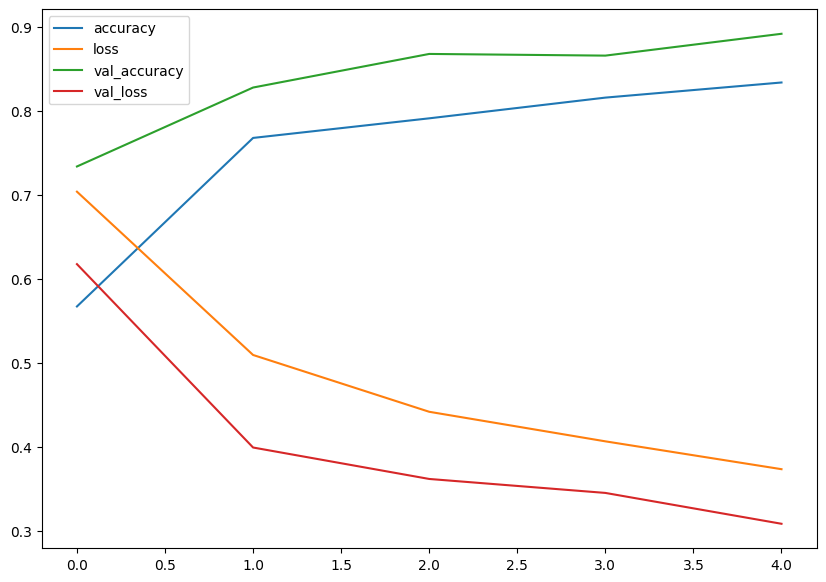

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 112, 112, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 56, 56, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 28, 28, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         7,841 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,825 (116.51 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,884 (77.68 KB)